## Import Libraries

In [1]:
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras import layers, models, optimizers, metrics
import matplotlib.pyplot as plt
import numpy as np
import os
import warnings
warnings.filterwarnings('ignore')

Using TensorFlow backend.


# Classification on Fei Face Dataset (Accuracy Evaluation)

## Reading Filenames
* os.getcwd() function will get the current working directory

In [18]:
train_dir = os.getcwd() + "\\good_and_bad_moods\\brazil\\brazil_dataset\\train"
validation_dir = os.getcwd() + "\\good_and_bad_moods\\test"

## Convolutional Neural Network Model
* There are 3 convolutional layers with Max pooling layers to extract major features from the image.
* Dropout layers have been added to avoid overfitting.
* Fatten layer has been added to convert the image into a (n x 1) tensor to feed into a fully connected layer.
* Model is being compiled in the end.
* The loss function has been set to binary cross entropy as it generally results in better training on binary classes.

In [19]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(50, 50, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.2))
# model.add(layers.Conv2D(128, (3, 3), activation='relu'))
# model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
            optimizer=optimizers.RMSprop(lr=1e-4),
            metrics=['acc'])

## Saving the model with the best accuracy
* The library helps in saving the model with the best accuracy during the training phase.

In [20]:
from keras.callbacks import ModelCheckpoint
mc = ModelCheckpoint('brazil_good_and_bad_moods.hdf5', monitor='val_acc', verbose=1, save_best_only=True, mode='max')

## Loading Training and Testing Data of Fei Face Dataset
### The following steps are being done in the following code cell
* Setting up train and test Image data generators with data augmentation to increase the size of the datasets and to avoid overfitting
* The hyperparameters in the ImageDataGenerator direct how the images are to be augmented.
* Having the data generators to direct image data from the directories to the model without having us to manually direct them.
* The no. of epochs has has been set to 20 as that is deemed enough to properly train a small model from scratch.
* The class_mode has been set to binary as there are only 2 classes to classify.
* Training is performed on the Fei Face dataset and testing is done on Joey's private collection.

In [21]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                  rotation_range=40,
                                  width_shift_range=0.2,
                                  height_shift_range=0.2,
                                  shear_range=0.2,
                                  zoom_range=0.2,
                                  horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

In [23]:
train_generator = train_datagen.flow_from_directory(train_dir,
                                                   target_size=(50, 50),
                                                   batch_size=32,
                                                   class_mode='binary')

validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                        target_size=(50, 50),
                                                        batch_size=40,
                                                        class_mode='binary')

history = model.fit_generator(train_generator,
                            steps_per_epoch=150,
                            epochs=20,
                            callbacks=[mc],
                            validation_data=validation_generator,
                            validation_steps=100)

Found 300 images belonging to 2 classes.
Found 40 images belonging to 2 classes.
Epoch 1/20
150/150 [==============================] - 34s 226ms/step - loss: 0.6765 - acc: 0.5660 - val_loss: 0.6996 - val_acc: 0.5250

Epoch 00001: val_acc improved from -inf to 0.52500, saving model to brazil_good_and_bad_moods.hdf5
Epoch 2/20
150/150 [==============================] - 29s 195ms/step - loss: 0.5766 - acc: 0.7153 - val_loss: 0.8755 - val_acc: 0.5250

Epoch 00002: val_acc did not improve from 0.52500
Epoch 3/20
150/150 [==============================] - 29s 195ms/step - loss: 0.4842 - acc: 0.7756 - val_loss: 1.3426 - val_acc: 0.5000

Epoch 00003: val_acc did not improve from 0.52500
Epoch 4/20
150/150 [==============================] - 28s 186ms/step - loss: 0.4467 - acc: 0.7964 - val_loss: 1.9675 - val_acc: 0.5000

Epoch 00004: val_acc did not improve from 0.52500
Epoch 5/20
150/150 [==============================] - 29s 194ms/step - loss: 0.4032 - acc: 0.8209 - val_loss: 2.3544 - val_acc

## Graphs of the Results

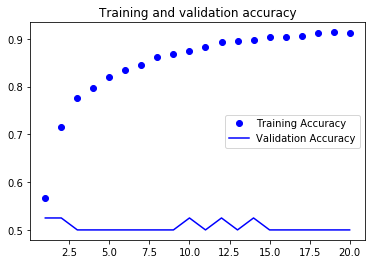

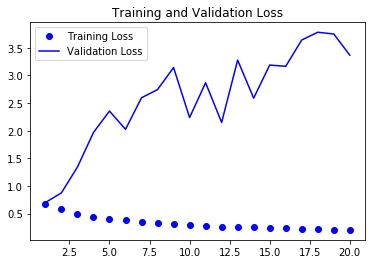

In [24]:
# Plotting the train accuracy and loss graphs

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'bo', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title("Training and validation accuracy")
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title("Training and Validation Loss")
plt.legend()

plt.show()

# Classification on Fei Face Dataset (Area Under Curve Evaluation)

In [37]:
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras import layers, models, optimizers, metrics

## Reading Filenames
* os.getcwd() function will get the current working directory

In [38]:
train_dir = os.getcwd() + "\\good_and_bad_moods\\brazil\\brazil_dataset\\train"
validation_dir = os.getcwd() + "\\good_and_bad_moods\\test"

## Convolutional Neural Network Model
* There are 3 convolutional layers with Max pooling layers to extract major features from the image.
* Dropout layers have been added to avoid overfitting.
* Fatten layer has been added to convert the image into a (n x 1) tensor to feed into a fully connected layer.
* Model is being compiled in the end.
* The loss function has been set to binary cross entropy as it generally results in better training on binary classes.

In [39]:
model_1 = models.Sequential()

model_1.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(50, 50, 3)))
model_1.add(layers.MaxPooling2D((2, 2)))
model_1.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_1.add(layers.MaxPooling2D((2, 2)))
model_1.add(layers.Conv2D(128, (3, 3), activation='relu'))
model_1.add(layers.MaxPooling2D((2, 2)))
model_1.add(layers.Dropout(0.3))
model_1.add(layers.Conv2D(128, (3, 3), activation='relu'))
model_1.add(layers.MaxPooling2D((2, 2)))
model_1.add(layers.Flatten())
model_1.add(layers.Dropout(0.5))
model_1.add(layers.Dense(512, activation='relu'))
model_1.add(layers.Dense(1, activation='sigmoid'))

model_1.compile(loss='binary_crossentropy',
            optimizer=optimizers.RMSprop(lr=1e-4),
            metrics=[metrics.AUC()])

## Saving the model with the best accuracy
* The library helps in saving the model with the best accuracy during the training phase.

In [40]:
from keras.callbacks import ModelCheckpoint
mc = ModelCheckpoint('brazil_good_and_bad_moods_auc.hdf5', monitor='val_auc_1', verbose=1, save_best_only=True, mode='max')

## Loading Training and Testing Data of Fei Face Dataset
### The following steps are being done in the following code cell
* Setting up train and test Image data generators with data augmentation to increase the size of the datasets and to avoid overfitting
* The hyperparameters in the ImageDataGenerator direct how the images are to be augmented.
* Having the data generators to direct image data from the directories to the model without having us to manually direct them.
* The no. of epochs has has been set to 20 as that is deemed enough to properly train a small model from scratch.
* The class_mode has been set to binary as there are only 2 classes to classify.
* Training is performed on the Fei Face dataset and testing is done on Joey's private collection.

In [41]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                  rotation_range=40,
                                  width_shift_range=0.2,
                                  height_shift_range=0.2,
                                  shear_range=0.2,
                                  zoom_range=0.2,
                                  horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

In [42]:
train_generator = train_datagen.flow_from_directory(train_dir,
                                                   target_size=(50, 50),
                                                   batch_size=32,
                                                   class_mode='binary')

validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                        target_size=(50, 50),
                                                        batch_size=40,
                                                        class_mode='binary')

history = model_1.fit_generator(train_generator,
                            steps_per_epoch=150,
                            epochs=20,
                            callbacks=[mc],
                            validation_data=validation_generator,
                            validation_steps=100)

Found 300 images belonging to 2 classes.
Found 40 images belonging to 2 classes.
Epoch 1/20
150/150 [==============================] - 38s 257ms/step - loss: 0.6904 - auc_1: 0.5492 - val_loss: 0.6922 - val_auc_1: 0.5562

Epoch 00001: val_auc_1 improved from -inf to 0.55625, saving model to brazil_good_and_bad_moods_auc.hdf5
Epoch 2/20
150/150 [==============================] - 37s 248ms/step - loss: 0.6482 - auc_1: 0.7094 - val_loss: 0.8390 - val_auc_1: 0.6350

Epoch 00002: val_auc_1 improved from 0.55625 to 0.63500, saving model to brazil_good_and_bad_moods_auc.hdf5
Epoch 3/20
150/150 [==============================] - 37s 247ms/step - loss: 0.5371 - auc_1: 0.8079 - val_loss: 1.2509 - val_auc_1: 0.6175

Epoch 00003: val_auc_1 did not improve from 0.63500
Epoch 4/20
150/150 [==============================] - 37s 250ms/step - loss: 0.4480 - auc_1: 0.8685 - val_loss: 1.3086 - val_auc_1: 0.5775

Epoch 00004: val_auc_1 did not improve from 0.63500
Epoch 5/20
150/150 [======================

## Graphs of the Results

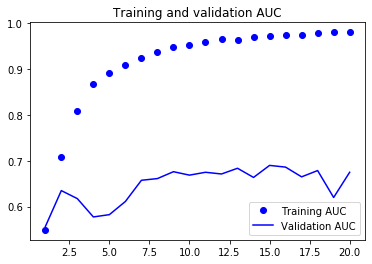

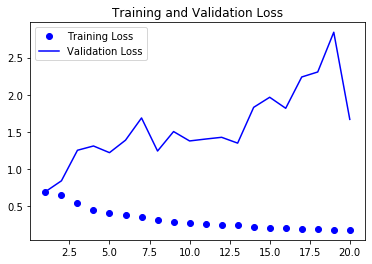

In [43]:
auc = history.history['auc_1']
val_auc = history.history['val_auc_1']
auc_loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(auc)+1)

plt.plot(epochs, auc, 'bo', label='Training AUC')
plt.plot(epochs, val_auc, 'b', label='Validation AUC')
plt.title("Training and validation AUC")
plt.legend()

plt.figure()

plt.plot(epochs, auc_loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title("Training and Validation Loss")
plt.legend()

plt.show()

# Classification on JAFFE Dataset (Accuracy Evaluation)

## Reading Filenames
* os.getcwd() function will get the current working directory

In [31]:
train_dir = os.getcwd() + "\\good_and_bad_moods\\japanese\\train"
validation_dir = os.getcwd() + "\\good_and_bad_moods\\test"

## Convolutional Neural Network Model
* There are 3 convolutional layers with Max pooling layers to extract major features from the image.
* Dropout layers have been added to avoid overfitting.
* Fatten layer has been added to convert the image into a (n x 1) tensor to feed into a fully connected layer.
* Model is being compiled in the end.
* The loss function has been set to binary cross entropy as it generally results in better training on binary classes.

In [32]:
model_2 = models.Sequential()

model_2.add(layers.Conv2D(16, (3, 3), activation='relu', input_shape=(50, 50, 3)))
model_2.add(layers.MaxPooling2D((2, 2)))
model_2.add(layers.Conv2D(32, (3, 3), activation='relu'))
model_2.add(layers.MaxPooling2D((2, 2)))
model_2.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_2.add(layers.MaxPooling2D((2, 2)))
model_2.add(layers.Conv2D(128, (3, 3), activation='relu'))
model_2.add(layers.MaxPooling2D((2, 2)))
model_2.add(layers.Flatten())
model_2.add(layers.Dropout(0.5))
model_2.add(layers.Dense(256, activation='relu'))
model_2.add(layers.Dense(1, activation='sigmoid'))

model_2.compile(loss='binary_crossentropy',
            optimizer=optimizers.RMSprop(lr=1e-4),
            metrics=['acc'])

## Saving the model with the best accuracy
* The library helps in saving the model with the best accuracy during the training phase.

In [33]:
from keras.callbacks import ModelCheckpoint
mc = ModelCheckpoint('japanese_good_and_bad_moods.hdf5', monitor='val_acc', verbose=1, save_best_only=True, mode='max')

## Loading Training and Testing Data of JAFFE Dataset
### The following steps are being done in the following code cell
* Setting up train and test Image data generators with data augmentation to increase the size of the datasets and to avoid overfitting
* The hyperparameters in the ImageDataGenerator direct how the images are to be augmented.
* Having the data generators to direct image data from the directories to the model without having us to manually direct them.
* The no. of epochs has has been set to 20 as that is deemed enough to properly train a small model from scratch.
* The class_mode has been set to binary as there are only 2 classes to classify.
* Training is performed on the JAFFE dataset and testing is done on Joey's private collection.

In [34]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                  rotation_range=40,
                                  width_shift_range=0.2,
                                  height_shift_range=0.2,
                                  shear_range=0.2,
                                  zoom_range=0.2,
                                  horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

In [35]:
train_generator = train_datagen.flow_from_directory(train_dir,
                                                   target_size=(50, 50),
                                                   batch_size=32,
                                                   class_mode='binary')

validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                        target_size=(50, 50),
                                                        batch_size=40,
                                                        class_mode='binary')

history = model_2.fit_generator(train_generator,
                            steps_per_epoch=150,
                            epochs=20,
                            callbacks=[mc],
                            validation_data=validation_generator,
                            validation_steps=100)

Found 167 images belonging to 2 classes.
Found 40 images belonging to 2 classes.
Epoch 1/20
150/150 [==============================] - 40s 265ms/step - loss: 0.6404 - acc: 0.6704 - val_loss: 0.7641 - val_acc: 0.5000

Epoch 00001: val_acc improved from -inf to 0.50000, saving model to japanese_good_and_bad_moods.hdf5
Epoch 2/20
150/150 [==============================] - 39s 260ms/step - loss: 0.6437 - acc: 0.6707 - val_loss: 0.7653 - val_acc: 0.5000

Epoch 00002: val_acc did not improve from 0.50000
Epoch 3/20
150/150 [==============================] - 40s 264ms/step - loss: 0.6383 - acc: 0.6707 - val_loss: 0.7920 - val_acc: 0.5000

Epoch 00003: val_acc did not improve from 0.50000
Epoch 4/20
150/150 [==============================] - 40s 266ms/step - loss: 0.6360 - acc: 0.6707 - val_loss: 0.7750 - val_acc: 0.5000

Epoch 00004: val_acc did not improve from 0.50000
Epoch 5/20
150/150 [==============================] - 43s 286ms/step - loss: 0.6364 - acc: 0.6707 - val_loss: 0.7611 - val_a

## Graphs of the Results

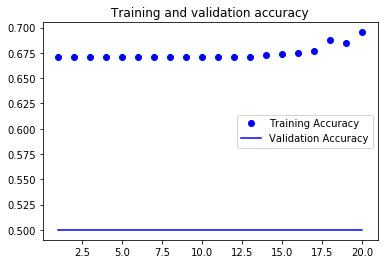

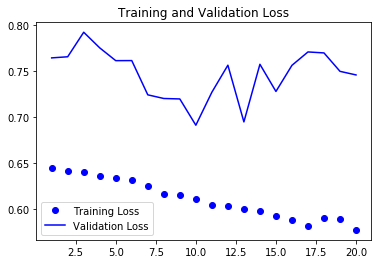

In [36]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'bo', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title("Training and validation accuracy")
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title("Training and Validation Loss")
plt.legend()

plt.show()

# Classification on JAFFE Dataset (Area Under Curve Evaluation)

## Reading Filenames
* os.getcwd() function will get the current working directory

In [9]:
# Setting directories for training and testing

train_dir = os.getcwd() + "\\good_and_bad_moods\\japanese\\train"
validation_dir = os.getcwd() + "\\good_and_bad_moods\\test"

## Convolutional Neural Network Model
* There are 3 convolutional layers with Max pooling layers to extract major features from the image.
* Dropout layers have been added to avoid overfitting.
* Fatten layer has been added to convert the image into a (n x 1) tensor to feed into a fully connected layer.
* Model is being compiled in the end.
* The loss function has been set to binary cross entropy as it generally results in better training on binary classes.

In [10]:
model_3 = models.Sequential()

model_3.add(layers.Conv2D(16, (3, 3), activation='relu', input_shape=(50, 50, 3)))
model_3.add(layers.MaxPooling2D((2, 2)))
model_3.add(layers.Conv2D(32, (3, 3), activation='relu'))
model_3.add(layers.MaxPooling2D((2, 2)))
model_3.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_3.add(layers.MaxPooling2D((2, 2)))
model_3.add(layers.Conv2D(128, (3, 3), activation='relu'))
model_3.add(layers.MaxPooling2D((2, 2)))
model_3.add(layers.Flatten())
model_3.add(layers.Dropout(0.5))
model_3.add(layers.Dense(256, activation='relu'))
model_3.add(layers.Dense(1, activation='sigmoid'))

model_3.compile(loss='binary_crossentropy',
            optimizer=optimizers.RMSprop(lr=1e-4),
            metrics=[metrics.AUC()])

## Saving the model with the best accuracy
* The library helps in saving the model with the best accuracy during the training phase.

In [14]:
from keras.callbacks import ModelCheckpoint
mc = ModelCheckpoint('japanese_good_and_bad_moods_auc.hdf5', monitor='val_auc_2', verbose=1, save_best_only=True, mode='max')

## Loading Training and Testing Data of JAFFE Dataset
### The following steps are being done in the following code cell
* Setting up train and test Image data generators with data augmentation to increase the size of the datasets and to avoid overfitting
* The hyperparameters in the ImageDataGenerator direct how the images are to be augmented.
* Having the data generators to direct image data from the directories to the model without having us to manually direct them.
* The no. of epochs has has been set to 20 as that is deemed enough to properly train a small model from scratch.
* The class_mode has been set to binary as there are only 2 classes to classify.
* Training is performed on the JAFFE dataset and testing is done on Joey's private collection.

In [15]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                  rotation_range=40,
                                  width_shift_range=0.2,
                                  height_shift_range=0.2,
                                  shear_range=0.2,
                                  zoom_range=0.2,
                                  horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

In [16]:
train_generator = train_datagen.flow_from_directory(train_dir,
                                                   target_size=(50, 50),
                                                   batch_size=32,
                                                   class_mode='binary')

validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                        target_size=(50, 50),
                                                        batch_size=40,
                                                        class_mode='binary')

history = model_3.fit_generator(train_generator,
                            steps_per_epoch=150,
                            epochs=20,
                            callbacks=[mc],
                            validation_data=validation_generator,
                            validation_steps=100)

Found 167 images belonging to 2 classes.
Found 40 images belonging to 2 classes.
Epoch 1/20
150/150 [==============================] - 23s 154ms/step - loss: 0.6396 - auc_2: 0.5068 - val_loss: 0.7627 - val_auc_2: 0.3537

Epoch 00001: val_auc_2 improved from -inf to 0.35375, saving model to japanese_good_and_bad_moods_auc.hdf5
Epoch 2/20
150/150 [==============================] - 22s 150ms/step - loss: 0.6247 - auc_2: 0.5425 - val_loss: 0.7652 - val_auc_2: 0.3875

Epoch 00002: val_auc_2 improved from 0.35375 to 0.38750, saving model to japanese_good_and_bad_moods_auc.hdf5
Epoch 3/20
150/150 [==============================] - 22s 150ms/step - loss: 0.6365 - auc_2: 0.5558 - val_loss: 0.7448 - val_auc_2: 0.4550

Epoch 00003: val_auc_2 improved from 0.38750 to 0.45500, saving model to japanese_good_and_bad_moods_auc.hdf5
Epoch 4/20
150/150 [==============================] - 22s 150ms/step - loss: 0.6194 - auc_2: 0.5790 - val_loss: 0.7473 - val_auc_2: 0.5200

Epoch 00004: val_auc_2 improved 

## Graphs of the Results

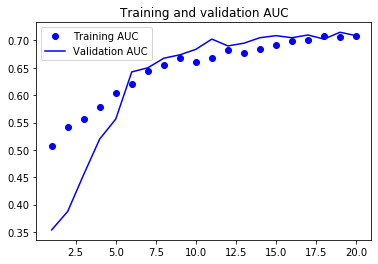

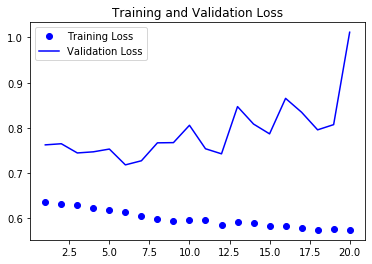

In [17]:
auc = history.history['auc_2']
val_auc = history.history['val_auc_2']
auc_loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(auc)+1)

plt.plot(epochs, auc, 'bo', label='Training AUC')
plt.plot(epochs, val_auc, 'b', label='Validation AUC')
plt.title("Training and validation AUC")
plt.legend()

plt.figure()

plt.plot(epochs, auc_loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title("Training and Validation Loss")
plt.legend()

plt.show()

# Classification on Mix(Fei Face + JAFFE) Dataset

## Reading Filenames
* os.getcwd() function will get the current working directory

In [58]:
train_dir = os.getcwd() + "\\good_and_bad_moods\\mix\\train"
validation_dir = os.getcwd() + "\\good_and_bad_moods\\test"

## Convolutional Neural Network Model
* There are 3 convolutional layers with Max pooling layers to extract major features from the image.
* Dropout layers have been added to avoid overfitting.
* Fatten layer has been added to convert the image into a (n x 1) tensor to feed into a fully connected layer.
* Model is being compiled in the end.
* The loss function has been set to binary cross entropy as it generally results in better training on binary classes.

In [59]:
model_4 = models.Sequential()

model_4.add(layers.Conv2D(16, (3, 3), activation='relu', input_shape=(50, 50, 3)))
model_4.add(layers.MaxPooling2D((2, 2)))
model_4.add(layers.Conv2D(32, (3, 3), activation='relu'))
model_4.add(layers.MaxPooling2D((2, 2)))
model_4.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_4.add(layers.MaxPooling2D((2, 2)))
model_4.add(layers.Conv2D(128, (3, 3), activation='relu'))
model_4.add(layers.MaxPooling2D((2, 2)))
model_4.add(layers.Flatten())
model_4.add(layers.Dropout(0.5))
model_4.add(layers.Dense(256, activation='relu'))
model_4.add(layers.Dense(1, activation='sigmoid'))

model_4.compile(loss='binary_crossentropy',
            optimizer=optimizers.RMSprop(lr=1e-4),
            metrics=['acc'])

## Saving the model with the best accuracy
* The library helps in saving the model with the best accuracy during the training phase.

In [60]:
from keras.callbacks import ModelCheckpoint
mc = ModelCheckpoint('mix_good_and_bad_moods.hdf5', monitor='val_acc', verbose=1, save_best_only=True, mode='max')

## Loading Training and Testing Data of MIX ( Fei Face + JAFFE) Dataset
### The following steps are being done in the following code cell
* Setting up train and test Image data generators with data augmentation to increase the size of the datasets and to avoid overfitting
* The hyperparameters in the ImageDataGenerator direct how the images are to be augmented.
* Having the data generators to direct image data from the directories to the model without having us to manually direct them.
* The no. of epochs has has been set to 20 as that is deemed enough to properly train a small model from scratch.
* The class_mode has been set to binary as there are only 2 classes to classify.
* Training is performed on the MIX ( Fei Face + JAFFE) dataset and testing is done on Joey's private collection.

In [61]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                  rotation_range=40,
                                  width_shift_range=0.2,
                                  height_shift_range=0.2,
                                  shear_range=0.2,
                                  zoom_range=0.2,
                                  horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

In [62]:
train_generator = train_datagen.flow_from_directory(train_dir,
                                                   target_size=(50, 50),
                                                   batch_size=32,
                                                   class_mode='binary')

validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                        target_size=(50, 50),
                                                        batch_size=40,
                                                        class_mode='binary')

history = model_4.fit_generator(train_generator,
                            steps_per_epoch=150,
                            epochs=20,
                            callbacks=[mc],
                            validation_data=validation_generator,
                            validation_steps=100)

Found 465 images belonging to 2 classes.
Found 40 images belonging to 2 classes.
Epoch 1/20
150/150 [==============================] - 22s 144ms/step - loss: 0.6870 - acc: 0.5591 - val_loss: 0.7071 - val_acc: 0.5000

Epoch 00001: val_acc improved from -inf to 0.50000, saving model to mix_good_and_bad_moods.hdf5
Epoch 2/20
150/150 [==============================] - 21s 139ms/step - loss: 0.6807 - acc: 0.5811 - val_loss: 0.7029 - val_acc: 0.5000

Epoch 00002: val_acc did not improve from 0.50000
Epoch 3/20
150/150 [==============================] - 21s 139ms/step - loss: 0.6650 - acc: 0.6355 - val_loss: 0.7134 - val_acc: 0.5250

Epoch 00003: val_acc improved from 0.50000 to 0.52500, saving model to mix_good_and_bad_moods.hdf5
Epoch 4/20
150/150 [==============================] - 21s 140ms/step - loss: 0.6184 - acc: 0.6901 - val_loss: 0.7197 - val_acc: 0.4500

Epoch 00004: val_acc did not improve from 0.52500
Epoch 5/20
150/150 [==============================] - 21s 139ms/step - loss: 0.5

## Graphs of the Results

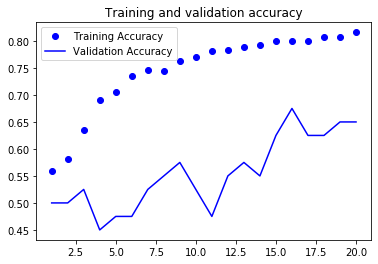

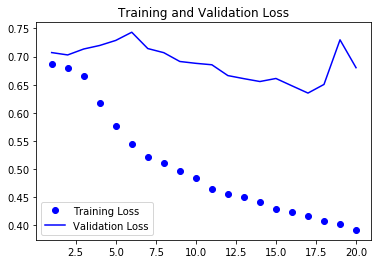

In [63]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'bo', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title("Training and validation accuracy")
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title("Training and Validation Loss")
plt.legend()

plt.show()

# Classification on Mix(Fei Face + JAFFE) Dataset (Area Under Curve Evaluation)

## Reading Filenames
* os.getcwd() function will get the current working directory

In [2]:
train_dir = os.getcwd() + "\\good_and_bad_moods\\mix\\train"
validation_dir = os.getcwd() + "\\good_and_bad_moods\\test"

## Convolutional Neural Network Model
* There are 3 convolutional layers with Max pooling layers to extract major features from the image.
* Dropout layers have been added to avoid overfitting.
* Fatten layer has been added to convert the image into a (n x 1) tensor to feed into a fully connected layer.
* Model is being compiled in the end.
* The loss function has been set to binary cross entropy as it generally results in better training on binary classes.

In [3]:
model_5 = models.Sequential()

model_5.add(layers.Conv2D(16, (3, 3), activation='relu', input_shape=(50, 50, 3)))
model_5.add(layers.MaxPooling2D((2, 2)))
model_5.add(layers.Conv2D(32, (3, 3), activation='relu'))
model_5.add(layers.MaxPooling2D((2, 2)))
model_5.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_5.add(layers.MaxPooling2D((2, 2)))
model_5.add(layers.Conv2D(128, (3, 3), activation='relu'))
model_5.add(layers.MaxPooling2D((2, 2)))
model_5.add(layers.Flatten())
model_5.add(layers.Dropout(0.5))
model_5.add(layers.Dense(256, activation='relu'))
model_5.add(layers.Dense(1, activation='sigmoid'))

model_5.compile(loss='binary_crossentropy',
            optimizer=optimizers.RMSprop(lr=1e-4),
            metrics=[metrics.AUC()])

## Saving the model with the best accuracy
* The library helps in saving the model with the best accuracy during the training phase.

In [18]:
from keras.callbacks import ModelCheckpoint
mc = ModelCheckpoint('mix_good_and_bad_moods_auc.hdf5', monitor='val_auc_3', verbose=1, save_best_only=True, mode='max')

## Loading Training and Testing Data of MIX ( Fei Face + JAFFE) Dataset
### The following steps are being done in the following code cell
* Setting up train and test Image data generators with data augmentation to increase the size of the datasets and to avoid overfitting
* The hyperparameters in the ImageDataGenerator direct how the images are to be augmented.
* Having the data generators to direct image data from the directories to the model without having us to manually direct them.
* The no. of epochs has has been set to 20 as that is deemed enough to properly train a small model from scratch.
* The class_mode has been set to binary as there are only 2 classes to classify.
* Training is performed on the JAFFE dataset and testing is done on Joey's private collection.

In [19]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                  rotation_range=40,
                                  width_shift_range=0.2,
                                  height_shift_range=0.2,
                                  shear_range=0.2,
                                  zoom_range=0.2,
                                  horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
train_generator = train_datagen.flow_from_directory(train_dir,
                                                   target_size=(50, 50),
                                                   batch_size=32,
                                                   class_mode='binary')

validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                        target_size=(50, 50),
                                                        batch_size=40,
                                                        class_mode='binary')

history = model_5.fit_generator(train_generator,
                            steps_per_epoch=150,
                            epochs=20,
                            callbacks=[mc],
                            validation_data=validation_generator,
                            validation_steps=100)

Found 167 images belonging to 2 classes.
Found 40 images belonging to 2 classes.
Epoch 1/20
150/150 [==============================] - 23s 153ms/step - loss: 0.6233 - auc_1: 0.5894 - val_loss: 0.6687 - val_auc_1: 0.6413

Epoch 00001: val_auc_1 improved from -inf to 0.64125, saving model to mix_good_and_bad_moods_auc.hdf5
Epoch 2/20
150/150 [==============================] - 22s 150ms/step - loss: 0.6196 - auc_1: 0.6117 - val_loss: 0.6328 - val_auc_1: 0.7050

Epoch 00002: val_auc_1 improved from 0.64125 to 0.70500, saving model to mix_good_and_bad_moods_auc.hdf5
Epoch 3/20
150/150 [==============================] - 22s 150ms/step - loss: 0.6113 - auc_1: 0.6334 - val_loss: 0.6774 - val_auc_1: 0.6625

Epoch 00003: val_auc_1 did not improve from 0.70500
Epoch 4/20
150/150 [==============================] - 22s 150ms/step - loss: 0.6067 - auc_1: 0.6346 - val_loss: 0.7213 - val_auc_1: 0.6575

Epoch 00004: val_auc_1 did not improve from 0.70500
Epoch 5/20
150/150 [============================

## Graphs of the Results

In [ ]:
auc = history.history['auc_1']
val_auc = history.history['val_auc_3']
auc_loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(auc)+1)

plt.plot(epochs, auc, 'bo', label='Training AUC')
plt.plot(epochs, val_auc, 'b', label='Validation AUC')
plt.title("Training and validation AUC")
plt.legend()

plt.figure()

plt.plot(epochs, auc_loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title("Training and Validation Loss")
plt.legend()

plt.show()

# Comparison
CNN was used and following table represents the execution on the Joel's private collection images which were the testing images.

| Dataset | Accuracy | Area under Curve Score |
| --- | --- | --- |
| Fei Face | 52.5% | 0.605 |
| JAFFE | 50% | 0.719 |
| Mix (Fei Face + JAFFE) | 67.5% | 0.760 |